**DATA DIRI**

*   Nama: Melvin Toni Gustave
*   Email: melvin.working@gmail.com
*   Kota: Bandung

In [116]:
# Delete folder
!rm -rf '/tmp/melvin'

In [117]:
# Download dataset
import os
import zipfile
import sklearn

if not os.path.exists('/tmp/melvin/'):
    os.mkdir('/tmp/melvin/')

!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/melvin/rockpaperscissors.zip

# Extract dan simpan dataset ke spesifik folder
local_zip = '/tmp/melvin/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/melvin')
zip_ref.close()

--2020-10-31 18:31:09--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/melvin/rockpaperscissors.zip’

/tmp/melvin/rockpap 100%[===================>] 307.92M  19.1MB/s    in 15s     

2020-10-31 18:31:24 (20.2 MB/s) - ‘/tmp/melvin/rockpaperscissors.zip’ saved [322873683/322873683]



In [118]:
# Bagi dataset ke train dan validation
!pip install split-folders

import os
import splitfolders

base_dir = '/tmp/melvin/rockpaperscissors/rps-cv-images'
output_dir = '/tmp/melvin/rockpaperscissors/split'
splitfolders.ratio(base_dir, output=output_dir, seed=1337, ratio=(.6, .4), group_prefix=None)

# Hitung dataset, 60% utk training, 40% utk validation
train_paper = os.listdir('/tmp/melvin/rockpaperscissors/split/train/paper')
train_rock = os.listdir('/tmp/melvin/rockpaperscissors/split/train/rock')
train_scissors = os.listdir('/tmp/melvin/rockpaperscissors/split/train/scissors')
count_train_files = len(train_paper + train_rock + train_scissors)

val_paper = os.listdir('/tmp/melvin/rockpaperscissors/split/val/paper')
val_rock = os.listdir('/tmp/melvin/rockpaperscissors/split/val/rock')
val_scissors = os.listdir('/tmp/melvin/rockpaperscissors/split/val/scissors')
count_val_files = len(val_paper + val_rock + val_scissors)

print ("train data =>", count_train_files);
print ("validation data =>", count_val_files);

Copying files: 2188 files [00:00, 3779.42 files/s]

train data => 1312
validation data => 876


In [122]:
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = '/tmp/melvin/rockpaperscissors/split/train'
validation_dir = '/tmp/melvin/rockpaperscissors/split/val'

train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=10,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=10,
        class_mode='categorical')

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

model.fit(
      train_generator,
      steps_per_epoch=25,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=5,
      verbose=2)

print(train_generator.class_indices)

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.
Epoch 1/20
25/25 - 13s - loss: 1.1113 - accuracy: 0.3840 - val_loss: 1.1890 - val_accuracy: 0.3200
Epoch 2/20
25/25 - 13s - loss: 1.0667 - accuracy: 0.4200 - val_loss: 0.8817 - val_accuracy: 0.5400
Epoch 3/20
25/25 - 13s - loss: 0.7581 - accuracy: 0.7160 - val_loss: 0.6876 - val_accuracy: 0.7800
Epoch 4/20
25/25 - 13s - loss: 0.4170 - accuracy: 0.8560 - val_loss: 0.4768 - val_accuracy: 0.8800
Epoch 5/20
25/25 - 12s - loss: 0.3270 - accuracy: 0.8678 - val_loss: 0.4462 - val_accuracy: 0.8600
Epoch 6/20
25/25 - 13s - loss: 0.4085 - accuracy: 0.8400 - val_loss: 0.5530 - val_accuracy: 0.6800
Epoch 7/20
25/25 - 13s - loss: 0.2457 - accuracy: 0.9240 - val_loss: 0.3727 - val_accuracy: 0.8800
Epoch 8/20
25/25 - 13s - loss: 0.2303 - accuracy: 0.9280 - val_loss: 0.1779 - val_accuracy: 0.9200
Epoch 9/20
25/25 - 13s - loss: 0.2188 - accuracy: 0.9120 - val_loss: 0.4350 - val_accuracy: 0.8600
Epoch 10/20
25/25 - 13s - 

Saving 4vXhIZv7KkPhyfX9.png to 4vXhIZv7KkPhyfX9.png
classx [[0. 1. 0.]]
4vXhIZv7KkPhyfX9.png
rock


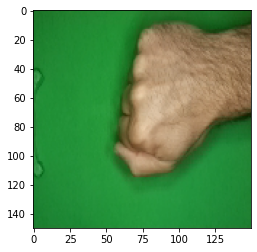

In [123]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print('classx', classes)
  print(fn)
  if classes[0,0]!=0:
    print('paper')
  elif classes[0,1]!=0:
    print('rock')
  else:
    print('scissors')